### 사전학습

In [28]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as su

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# 한글/차트 마이너스 없애기
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')


In [30]:
# 머신러닝 패키지 추가
import statsmodels.api as sm
import sklearn as sk

### 데이터 준비
#### 패션 MNIST

In [31]:
import tensorflow as tf

tf.__version__

'2.9.1'

- 텐서플로 1.x 개발된 오픈소스나 참조할 것은 거의 수정 해야 텐서플로 2.x 사용가능

In [32]:
from tensorflow.keras.datasets.mnist import load_data

(train_input, train_target), (test_input, test_target) = load_data() # 머신러닝이랑 순서 다름

In [33]:
# 훈련, 테스트 데이터셋 확인
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [34]:
print(train_input[0].shape)
print(test_target[0]) # 총 10개 중 9

(28, 28)
7


#### 훈련세트 입력 확인

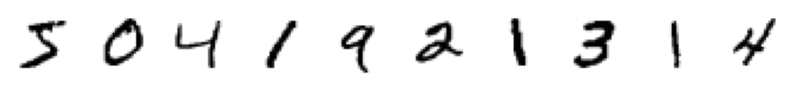

In [35]:
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [36]:
[train_target[i] for i in range(10)]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

MMIST 데이터 갯수

In [37]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [38]:
np.unique(test_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

In [39]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(train_input, train_target), (test_input, test_target) = load_data() # 머신러닝이랑 순서 다름

In [40]:
# 훈련, 테스트 데이터셋 확인
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [41]:
print(train_input[0].shape)
print(test_target[0]) # 총 10개 중 9

(28, 28)
9


#### 훈련세트 입력 확인

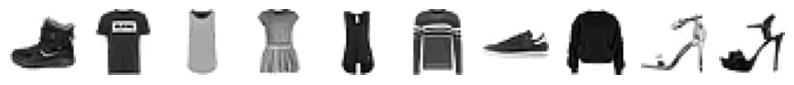

In [42]:
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

- 0      1    2      3      4    5    6    7       8    9 <br>
- 티셔츠 바지 스웨터 드레스 코트 샌달 셔츠 스니커즈 가방 앵클부츠

In [43]:
[train_target[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

MMIST 데이터 갯수

In [44]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [45]:
np.unique(test_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

##### 0~255 수를 0~1 사이의 값으로 정규화

In [47]:
train_scaled = train_input / 255.0
train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [48]:
train_scaled.shape

(60000, 28, 28)

In [49]:
train_scaled = train_scaled.reshape(-1, 28*28) # 2차원 -> 1차원

In [50]:
train_scaled.shape

(60000, 784)

#### 확률적 경사하강법
SGDClassifier -> 딥러닝 아님

In [51]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42) # 손실함수
scores = cross_validate(sc, X=train_scaled, y=train_target, n_jobs=-1) # n_jobs CPU 코어수
scores['test_score']

array([0.82908333, 0.81941667, 0.82075   , 0.80916667, 0.818     ])

In [52]:
np.mean(scores['test_score'])

0.8192833333333333

#### 인공신경망으로 훈련

In [53]:
from sklearn.model_selection import train_test_split

train_scaled, test_scaled, train_target, test_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [54]:
print(train_scaled.shape, train_target.shape)
print(test_scaled.shape, test_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [55]:
import tensorflow.keras as keras

In [58]:
model = keras.Sequential()
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model.add(dense)

#### 모델 실행(컴파일)

In [62]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [64]:
model.fit(train_scaled, train_target, epochs=5, verbose=1)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.1341 - accuracy: 0.3141
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.0666 - accuracy: 0.3392
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.0734 - accuracy: 0.3577
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.0605 - accuracy: 0.3670
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.0538 - accuracy: 0.3585


In [65]:
model.evaluate(test_scaled, test_target)

375/375 [==============================] - 1s 2ms/step - loss: 2.0347 - accuracy: 0.3845


[2.034715414047241, 0.38449999690055847]